<a href="https://colab.research.google.com/github/tasniat/Micro-Credential/blob/main/2021DatathonDA_DSMicroCredential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [4]:
dfcov = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [5]:
dfcov.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [6]:
dfcov.shape

(18384, 5)

In [7]:
dfcov.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [8]:
ny_df = dfcov[dfcov['state']=='New York']

In [9]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [10]:
ny_df.shape

(336, 5)

In [11]:
ny_df.tail()

,date,state,fips,cases,deaths
18142,2021-01-26,New York,36,1358964,42273
18197,2021-01-27,New York,36,1369329,42434
18252,2021-01-28,New York,36,1383112,42639
18307,2021-01-29,New York,36,1396063,42825
18362,2021-01-30,New York,36,1408955,42996


In [12]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [13]:
#total number of cases
ny_df['cases'].max()

1408955

In [14]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

162633699

Finding new covid 19 cases on daily basis (new cases added everyday)

In [28]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previous_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previous_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [34]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [36]:
ny_df['new_cases'].sum()

1408955

In [38]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [39]:
type(ny_new_cases)

pandas.core.series.Series

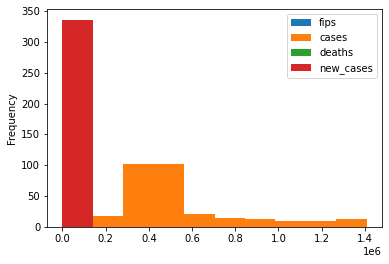

In [42]:
ny_df.plot(kind='hist')

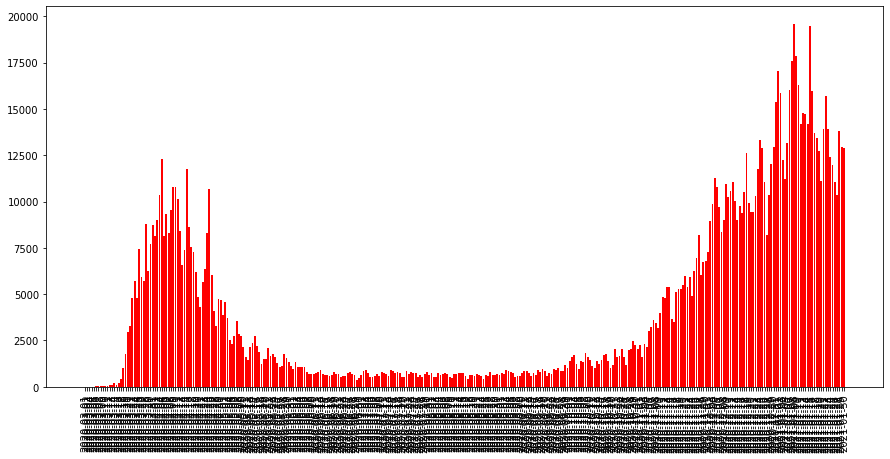

In [43]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [44]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

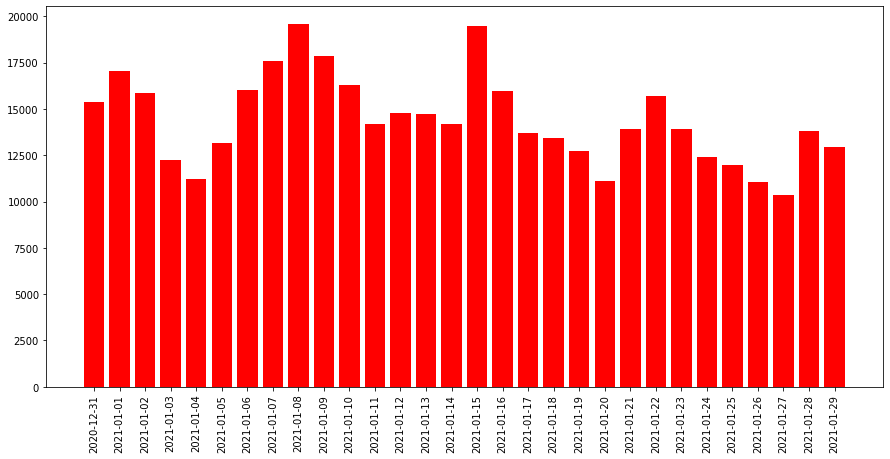

In [45]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

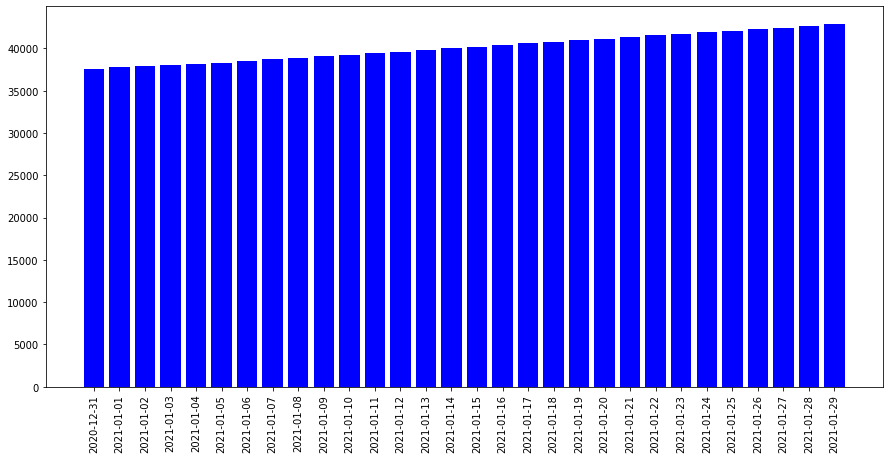

In [46]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [47]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

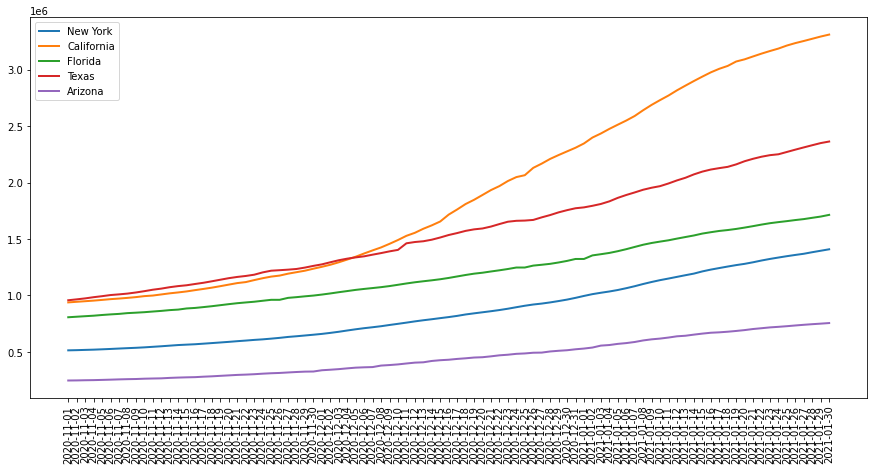

In [49]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = dfcov[(dfcov['state']==state) & (dfcov['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Datathon Project

# Part 1 COVID in NY by Months

COVID-19 impact for the year –quarterlyanalysis:

*   Pick New York state for your analysis
*   Find number of new cases and deaths reported in each month
*   Which month/ week was the deadliest
*   Do you see any trend in data when it comes to recovery suchas U shaperecovery





In [51]:
dfcov.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [124]:
#new deaths for NY
newdeath = []
previous_death = 0
for index, row in ny_df.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previous_death
  previous_death = current_death
  newdeath.append(newdeath_count)

In [ ]:
ny_df['new_deaths'] = newdeath
#ny_df.tail()

In [122]:
dates = ny_df.copy()
dates['id'] = pd.to_datetime(ny_df['date'])
dates.head()

,date,state,fips,cases,deaths,new_cases,new_deaths,id
246,2020-03-01,New York,36,1,0,1,0,2020-03-01
261,2020-03-02,New York,36,1,0,0,0,2020-03-02
276,2020-03-03,New York,36,2,0,1,0,2020-03-03
293,2020-03-04,New York,36,11,0,9,0,2020-03-04
313,2020-03-05,New York,36,22,0,11,0,2020-03-05


In [ ]:
dates[dates['id'].dt.month == 1]

In [125]:
covJan = dates[dates['id'].dt.month == 1] #This is 2021
covFeb = dates[dates['id'].dt.month == 2] #This is 2021
covMar = dates[dates['id'].dt.month == 3]
covApr = dates[dates['id'].dt.month == 4]
covMay = dates[dates['id'].dt.month == 5]
covJun = dates[dates['id'].dt.month == 6]
covJul = dates[dates['id'].dt.month == 7]
covAug = dates[dates['id'].dt.month == 8]
covSep = dates[dates['id'].dt.month == 9]
covOct = dates[dates['id'].dt.month == 10]
covNov = dates[dates['id'].dt.month == 11]
covDec = dates[dates['id'].dt.month == 12]

In [ ]:
#covJan.head(10)

In [127]:
countJan = 0
for i in covJan['new_cases']:
  countJan += i

countFeb = 0
for i in covFeb['new_cases']:
  countFeb += i

countMar = 0
for i in covMar['new_cases']:
  countMar += i

countApr = 0
for i in covApr['new_cases']:
  countApr += i

countMay = 0
for i in covMay['new_cases']:
  countMay += i

countJun = 0
for i in covJun['new_cases']:
  countJun += i

countJul = 0
for i in covJul['new_cases']:
  countJul += i

countAug = 0
for i in covAug['new_cases']:
  countAug += i

countSep = 0
for i in covSep['new_cases']:
  countSep += i

countOct = 0
for i in covOct['new_cases']:
  countOct += i

countNov = 0
for i in covNov['new_cases']:
  countNov += i

countDec = 0
for i in covDec['new_cases']:
  countDec += i

In [128]:
dcountJan = 0
for i in covJan['new_deaths']:
  dcountJan += i

dcountFeb = 0
for i in covFeb['new_deaths']:
  dcountFeb += i

dcountMar = 0
for i in covMar['new_deaths']:
  dcountMar += i

dcountApr = 0
for i in covApr['new_deaths']:
  dcountApr += i

dcountMay = 0
for i in covMay['new_deaths']:
  dcountMay += i

dcountJun = 0
for i in covJun['new_deaths']:
  dcountJun += i

dcountJul = 0
for i in covJul['new_deaths']:
  dcountJul += i

dcountAug = 0
for i in covAug['new_deaths']:
  dcountAug += i

dcountSep = 0
for i in covSep['new_deaths']:
  dcountSep += i

dcountOct = 0
for i in covOct['new_deaths']:
  dcountOct += i

dcountNov = 0
for i in covNov['new_deaths']:
  dcountNov += i

dcountDec = 0
for i in covDec['new_deaths']:
  dcountDec += i

In [151]:
case_count_dict = {'March': countMar, 
                   'April': countApr, 
                   'May': countMay, 
                   'June': countJun, 
                   'July': countJul, 
                   'August': countAug, 
                   'September': countSep, 
                   'October': countOct, 
                   'Novemeber': countNov, 
                   'December': countDec, 
                   'January': countJan, 
                   'February': countFeb
}
death_count_dict = {'March': dcountMar, 
                    'April': dcountApr, 
                    'May': dcountMay, 
                    'June': dcountJun, 
                    'July': dcountJul, 
                    'August': dcountAug, 
                    'September': dcountSep, 
                    'October': dcountOct, 
                    'November': dcountNov, 
                    'December': dcountDec, 
                    'January': dcountJan, 
                    'February': dcountFeb
}
# case_count_list
# death_count_list

In [162]:
deadliest_month_c = max(case_count_dict, key=case_count_dict.get)
deadliest_month_c

'January'

In [163]:
deadliest_month_d = max(death_count_dict, key=death_count_dict.get)
deadliest_month_d

'April'

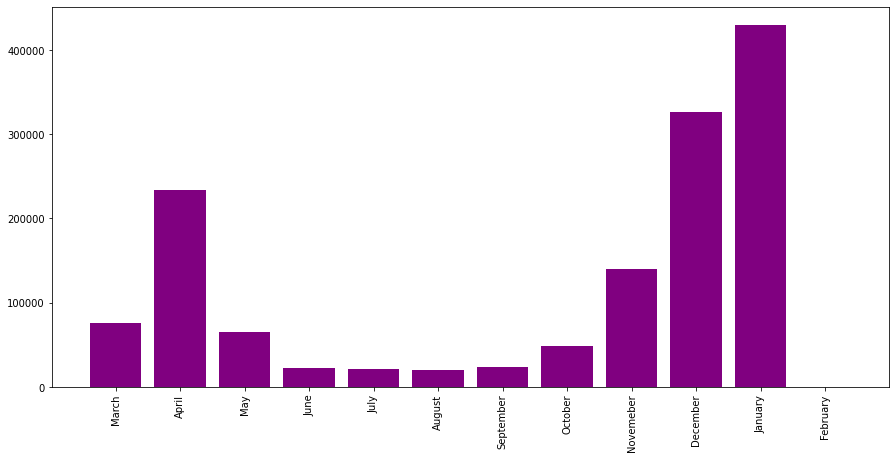

In [164]:
months = list(case_count_dict.keys())
numcases = list(case_count_dict.values())
plt.figure(figsize=(15,7))
plt.bar(x=months, height=numcases, color='purple')
plt.xticks(rotation=90)
plt.show()

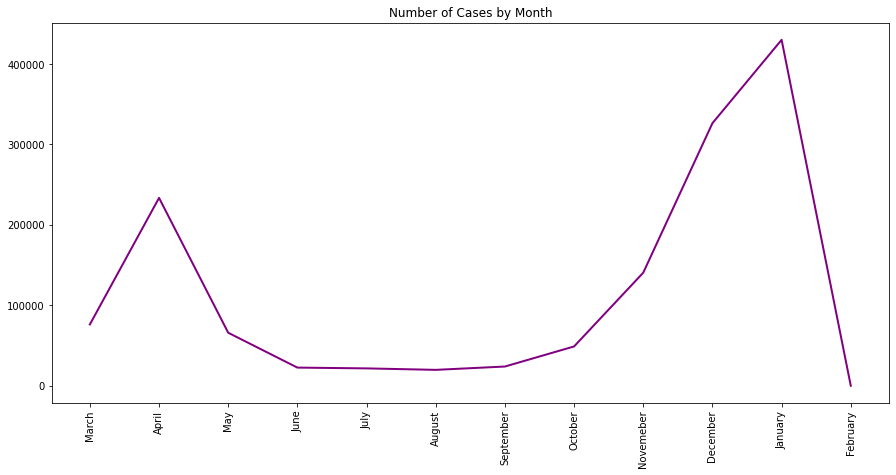

In [167]:
plt.figure(figsize=(15,7))
plt.plot(months, numcases, linewidth=2, color='purple')
plt.xticks(rotation=90)
plt.title('Number of Cases by Month')
plt.show()

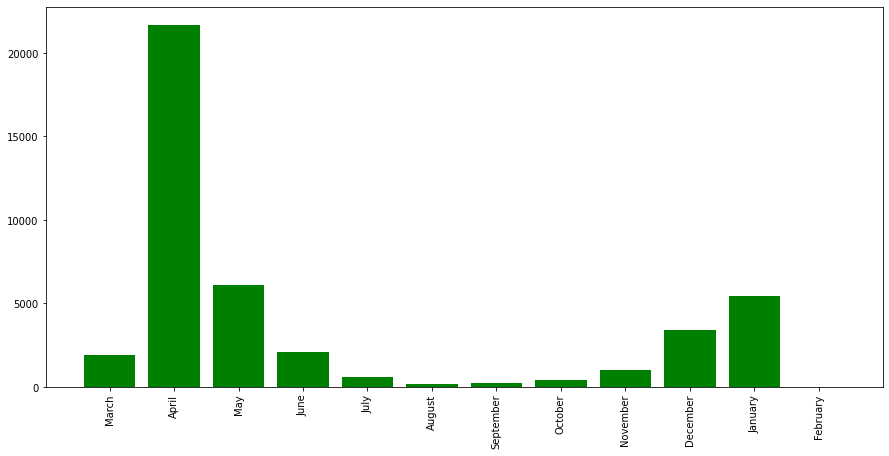

In [169]:
months = list(death_count_dict.keys())
numdeaths = list(death_count_dict.values())
plt.figure(figsize=(15,7))
plt.bar(x=months, height=numdeaths, color='green')
plt.xticks(rotation=90)
plt.show()

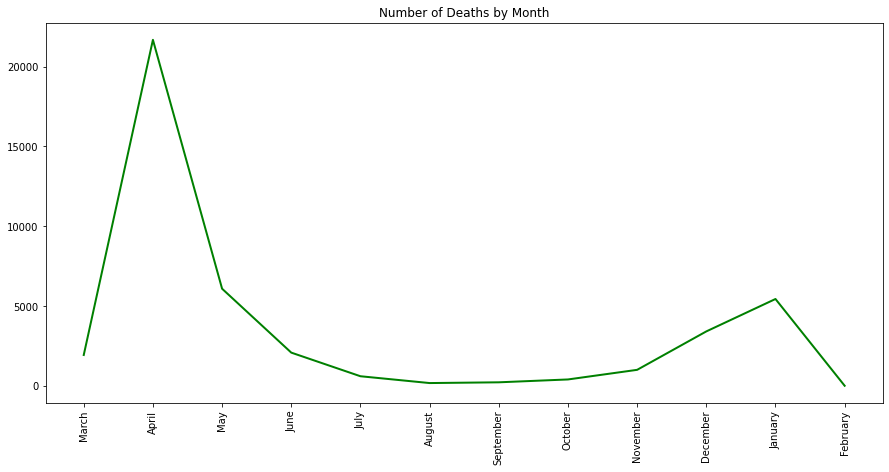

In [170]:
plt.figure(figsize=(15,7))
plt.plot(months, numdeaths, linewidth=2, color='green')
plt.xticks(rotation=90)
plt.title('Number of Deaths by Month')
plt.show()

# Part 1 Conclusions

Based on my analysis, I came to the following conclusions:


* Deadliest month in terms of cases:
  -- January 2021
* Deadliest month in terms of deaths:
  -- April 2020

In terms of trends, there did appear to be a U-shaped recovery. However, it was reversed for cases and deaths in terms of which side had the higher peak, as seen in the graphs above. 


# Part 2 Unemployment & COVID

Find some trend for unemploymentrate for New York State for the year 2020

*   Fix missing data problem 
*   Did unemploymentrate go up as COVID-19 new casesincreased



In [207]:
state_unemp_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/hackathon/data/state_unemployment_data_1.csv')

In [208]:
state_unemp_df.head()

,State,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Alabama,2.7,2.7,3.5,12.9,9.6,7.5,7.9,5.6,6.6,NaN,NaN,NaN
1,Alaska,6.0,5.8,5.6,12.9,12.7,12.4,11.6,7.4,7.2,NaN,NaN,NaN
2,Arizona,4.5,4.5,5.5,12.6,9.0,10.0,10.6,5.9,6.7,NaN,NaN,NaN
3,Arkansas,3.5,3.9,4.8,10.2,9.6,8.0,7.1,7.4,7.3,NaN,NaN,NaN
4,California,3.9,2.5,5.3,15.5,16.4,14.9,13.3,11.4,11.0,NaN,NaN,NaN


In [209]:
state_unemp_df.columns

Index(['State', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [210]:
test = state_unemp_df.T

In [211]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
Jan,2.7,6,4.5,3.5,3.9,2.5,3.7,4,5.2,2.8,3.1,2.7,2.8,3.5,3.1,2.8,3.1,4.3,5.1,3.1,3.3,2.8,3.8,3.2,5.5,3.5,3.5,3.9,3.6,2.6,3.8,4.8,3.8,3.6,2.3,4.1,3.3,3.3,4.7,3.1,2.4,3.4,3.3,4.5,2.5,2.4,2.7,3.9,5,3.5,3.7,8.9
Feb,2.7,5.8,4.5,3.9,2.5,2.8,3.9,5.2,2.8,3.1,2.7,2.7,3.4,3.1,2.8,3.1,4.2,5.2,3.2,3.3,2.8,3.6,3.1,5.4,3.5,3.5,2.9,3.6,3.6,3.8,4.8,3.7,3.6,2.2,4.2,3.2,3.3,4.7,3.4,2.5,3.3,3.4,3.5,2.5,3.4,2.6,3.8,4.9,3.7,2.7,5.8,4.5
March,3.5,5.6,5.5,4.8,5.3,4.5,3.7,5.1,6,4.3,4.2,2.6,2.6,4.6,3.2,3.7,3.1,5.8,6.1,3.2,3.3,2.9,4.1,3.1,5.3,4.5,3.5,4.2,6.3,2.6,3.8,5.9,4.5,4.4,2.2,5.5,3.1,3.3,6,4.6,2.6,3.3,3.5,4.7,3.6,3.2,3.3,5.1,6.1,3.4,3.7,NaN
April,12.9,12.9,12.6,10.2,15.5,11.3,7.9,14.3,11.1,12.9,11.9,22.3,11.5,16.4,16.9,10.2,11.2,15.4,14.5,10.6,9.9,15.1,22.7,8.1,15.4,9.7,11.3,8.2,28.3,16.3,15.3,11.3,14.5,12.2,8.5,16.8,13.7,14.2,15.1,17,12.1,10.2,14.7,12.8,9.7,15.6,10.6,15.4,15.2,14.1,9.2,NaN


In [212]:
test_1 = state_unemp_df.set_index('State').T

In [213]:
test_1.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
Jan,2.7,6.0,4.5,3.5,3.9,2.5,3.7,4.0,5.2,2.8,3.1,2.7,2.8,3.5,3.1,2.8,3.1,4.3,5.1,3.1,3.3,2.8,3.8,3.2,5.5,3.5,3.5,3.9,3.6,2.6,3.8,4.8,3.8,3.6,2.3,4.1,3.3,3.3,4.7,3.1,2.4,3.4,3.3,4.5,2.5,2.4,2.7,3.9,5.0,3.5,3.7,8.9
Feb,2.7,5.8,4.5,3.9,2.5,2.8,3.9,5.2,2.8,3.1,2.7,2.7,3.4,3.1,2.8,3.1,4.2,5.2,3.2,3.3,2.8,3.6,3.1,5.4,3.5,3.5,2.9,3.6,3.6,3.8,4.8,3.7,3.6,2.2,4.2,3.2,3.3,4.7,3.4,2.5,3.3,3.4,3.5,2.5,3.4,2.6,3.8,4.9,3.7,2.7,5.8,4.5
March,3.5,5.6,5.5,4.8,5.3,4.5,3.7,5.1,6.0,4.3,4.2,2.6,2.6,4.6,3.2,3.7,3.1,5.8,6.1,3.2,3.3,2.9,4.1,3.1,5.3,4.5,3.5,4.2,6.3,2.6,3.8,5.9,4.5,4.4,2.2,5.5,3.1,3.3,6.0,4.6,2.6,3.3,3.5,4.7,3.6,3.2,3.3,5.1,6.1,3.4,3.7,NaN
April,12.9,12.9,12.6,10.2,15.5,11.3,7.9,14.3,11.1,12.9,11.9,22.3,11.5,16.4,16.9,10.2,11.2,15.4,14.5,10.6,9.9,15.1,22.7,8.1,15.4,9.7,11.3,8.2,28.3,16.3,15.3,11.3,14.5,12.2,8.5,16.8,13.7,14.2,15.1,17.0,12.1,10.2,14.7,12.8,9.7,15.6,10.6,15.4,15.2,14.1,9.2,NaN
May,9.6,12.7,9.0,9.6,16.4,10.2,9.6,15.9,8.8,13.7,9.4,23.5,9.0,15.3,12.3,10.2,10.0,10.9,14.2,9.4,10.0,16.6,21.3,9.9,10.5,10.1,9.0,5.3,25.3,15.4,15.4,9.1,14.5,12.8,9.1,13.9,12.6,14.3,13.4,16.4,12.4,9.4,11.0,13.0,8.6,12.8,9.0,15.1,12.9,12.1,8.8,NaN


In [214]:
test_1['Alabama']

Jan       2.7
Feb       2.7
March     3.5
April    12.9
May       9.6
June      7.5
July      7.9
Aug       5.6
Sept      6.6
Oct       NaN
Nov       NaN
Dec       NaN
Name: Alabama, dtype: float64

In [215]:
test_1.drop('Puerto Rico', inplace=True, axis=1)
test_1

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Jan,2.7,6.0,4.5,3.5,3.9,2.5,3.7,4.0,5.2,2.8,3.1,2.7,2.8,3.5,3.1,2.8,3.1,4.3,5.1,3.1,3.3,2.8,3.8,3.2,5.5,3.5,3.5,3.9,3.6,2.6,3.8,4.8,3.8,3.6,2.3,4.1,3.3,3.3,4.7,3.1,2.4,3.4,3.3,4.5,2.5,2.4,2.7,3.9,5.0,3.5,3.7
Feb,2.7,5.8,4.5,3.9,2.5,2.8,3.9,5.2,2.8,3.1,2.7,2.7,3.4,3.1,2.8,3.1,4.2,5.2,3.2,3.3,2.8,3.6,3.1,5.4,3.5,3.5,2.9,3.6,3.6,3.8,4.8,3.7,3.6,2.2,4.2,3.2,3.3,4.7,3.4,2.5,3.3,3.4,3.5,2.5,3.4,2.6,3.8,4.9,3.7,2.7,5.8
March,3.5,5.6,5.5,4.8,5.3,4.5,3.7,5.1,6.0,4.3,4.2,2.6,2.6,4.6,3.2,3.7,3.1,5.8,6.1,3.2,3.3,2.9,4.1,3.1,5.3,4.5,3.5,4.2,6.3,2.6,3.8,5.9,4.5,4.4,2.2,5.5,3.1,3.3,6.0,4.6,2.6,3.3,3.5,4.7,3.6,3.2,3.3,5.1,6.1,3.4,3.7
April,12.9,12.9,12.6,10.2,15.5,11.3,7.9,14.3,11.1,12.9,11.9,22.3,11.5,16.4,16.9,10.2,11.2,15.4,14.5,10.6,9.9,15.1,22.7,8.1,15.4,9.7,11.3,8.2,28.3,16.3,15.3,11.3,14.5,12.2,8.5,16.8,13.7,14.2,15.1,17.0,12.1,10.2,14.7,12.8,9.7,15.6,10.6,15.4,15.2,14.1,9.2
May,9.6,12.7,9.0,9.6,16.4,10.2,9.6,15.9,8.8,13.7,9.4,23.5,9.0,15.3,12.3,10.2,10.0,10.9,14.2,9.4,10.0,16.6,21.3,9.9,10.5,10.1,9.0,5.3,25.3,15.4,15.4,9.1,14.5,12.8,9.1,13.9,12.6,14.3,13.4,16.4,12.4,9.4,11.0,13.0,8.6,12.8,9.0,15.1,12.9,12.1,8.8
June,7.5,12.4,10.0,8.0,14.9,10.5,9.8,12.5,8.6,10.4,7.6,13.9,5.6,14.6,11.2,8.0,7.5,4.3,9.7,6.6,8.0,17.4,14.8,8.6,8.7,7.9,7.1,6.7,15.0,11.8,16.6,8.3,15.7,7.6,6.1,10.9,6.6,11.2,13.0,12.4,8.7,7.2,9.7,8.6,5.1,9.4,8.4,9.8,10.4,8.5,7.6
July,7.9,11.6,10.6,7.1,13.3,7.4,10.2,10.4,8.4,11.3,7.6,13.1,5.0,11.3,7.8,6.6,7.2,5.7,9.4,9.9,7.6,16.1,8.7,7.7,10.8,6.9,6.4,4.8,14.0,8.1,13.9,12.7,15.9,8.5,6.6,8.9,7.1,10.4,13.7,11.2,8.6,6.3,9.5,8.0,4.5,8.3,8.0,10.3,9.9,7.0,7.1
Aug,5.6,7.4,5.9,7.4,11.4,6.7,8.1,8.9,8.5,7.4,5.6,12.5,4.2,11.0,6.4,6.0,6.9,7.6,7.6,6.9,6.0,11.3,8.7,7.4,7.9,7.0,5.6,4.0,13.2,6.5,10.9,11.3,12.5,6.5,5.0,8.9,5.7,7.7,10.3,12.8,6.3,4.8,8.5,6.8,4.1,4.8,6.1,8.5,8.9,6.2,6.6
Sept,6.6,7.2,6.7,7.3,11.0,6.4,7.8,8.2,8.7,7.6,6.4,15.1,6.1,10.2,6.2,4.7,5.9,5.6,8.1,6.1,7.2,9.6,8.5,6.0,7.1,4.9,5.3,3.5,12.6,6.0,6.7,9.4,9.7,7.3,4.4,8.4,5.3,8.0,8.1,10.5,5.1,4.1,6.3,8.3,5.0,4.2,6.2,7.8,8.6,5.4,6.1
Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
for col in test_1:
  test_1[col].fillna(test_1[col].mean(), inplace=True)

In [221]:
test_1

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Jan,2.700000,6.000000,4.5,3.500000,3.900000,2.500000,3.700000,4.000000,5.200000,2.800000,3.1,2.700000,2.800000,3.5,3.100000,2.800000,3.100000,4.3,5.100000,3.100000,3.300000,2.8,3.800000,3.2,5.5,3.500000,3.500000,3.900000,3.600000,2.600000,3.800000,4.8,3.800000,3.600000,2.300000,4.100000,3.300000,3.300000,4.700000,3.100000,2.400000,3.400000,3.300000,4.500000,2.500000,2.400000,2.700000,3.900000,5.000000,3.500000,3.700000
Feb,2.700000,5.800000,4.5,3.900000,2.500000,2.800000,3.900000,5.200000,2.800000,3.100000,2.7,2.700000,3.400000,3.1,2.800000,3.100000,4.200000,5.2,3.200000,3.300000,2.800000,3.6,3.100000,5.4,3.5,3.500000,2.900000,3.600000,3.600000,3.800000,4.800000,3.7,3.600000,2.200000,4.200000,3.200000,3.300000,4.700000,3.400000,2.500000,3.300000,3.400000,3.500000,2.500000,3.400000,2.600000,3.800000,4.900000,3.700000,2.700000,5.800000
March,3.500000,5.600000,5.5,4.800000,5.300000,4.500000,3.700000,5.100000,6.000000,4.300000,4.2,2.600000,2.600000,4.6,3.200000,3.700000,3.100000,5.8,6.100000,3.200000,3.300000,2.9,4.100000,3.1,5.3,4.500000,3.500000,4.200000,6.300000,2.600000,3.800000,5.9,4.500000,4.400000,2.200000,5.500000,3.100000,3.300000,6.000000,4.600000,2.600000,3.300000,3.500000,4.700000,3.600000,3.200000,3.300000,5.100000,6.100000,3.400000,3.700000
April,12.900000,12.900000,12.6,10.200000,15.500000,11.300000,7.900000,14.300000,11.100000,12.900000,11.9,22.300000,11.500000,16.4,16.900000,10.200000,11.200000,15.4,14.500000,10.600000,9.900000,15.1,22.700000,8.1,15.4,9.700000,11.300000,8.200000,28.300000,16.300000,15.300000,11.3,14.500000,12.200000,8.500000,16.800000,13.700000,14.200000,15.100000,17.000000,12.100000,10.200000,14.700000,12.800000,9.700000,15.600000,10.600000,15.400000,15.200000,14.100000,9.200000
May,9.600000,12.700000,9.0,9.600000,16.400000,10.200000,9.600000,15.900000,8.800000,13.700000,9.4,23.500000,9.000000,15.3,12.300000,10.200000,10.000000,10.9,14.200000,9.400000,10.000000,16.6,21.300000,9.9,10.5,10.100000,9.000000,5.300000,25.300000,15.400000,15.400000,9.1,14.500000,12.800000,9.100000,13.900000,12.600000,14.300000,13.400000,16.400000,12.400000,9.400000,11.000000,13.000000,8.600000,12.800000,9.000000,15.100000,12.900000,12.100000,8.800000
June,7.500000,12.400000,10.0,8.000000,14.900000,10.500000,9.800000,12.500000,8.600000,10.400000,7.6,13.900000,5.600000,14.6,11.200000,8.000000,7.500000,4.3,9.700000,6.600000,8.000000,17.4,14.800000,8.6,8.7,7.900000,7.100000,6.700000,15.000000,11.800000,16.600000,8.3,15.700000,7.600000,6.100000,10.900000,6.600000,11.200000,13.000000,12.400000,8.700000,7.200000,9.700000,8.600000,5.100000,9.400000,8.400000,9.800000,10.400000,8.500000,7.600000
July,7.900000,11.600000,10.6,7.100000,13.300000,7.400000,10.200000,10.400000,8.400000,11.300000,7.6,13.100000,5.000000,11.3,7.800000,6.600000,7.200000,5.7,9.400000,9.900000,7.600000,16.1,8.700000,7.7,10.8,6.900000,6.400000,4.800000,14.000000,8.100000,13.900000,12.7,15.900000,8.500000,6.600000,8.900000,7.100000,10.400000,13.700000,11.200000,8.600000,6.300000,9.500000,8.000000,4.500000,8.300000,8.000000,10.300000,9.900000,7.000000,7.100000
Aug,5.600000,7.400000,5.9,7.400000,11.400000,6.700000,8.100000,8.900000,8.500000,7.400000,5.6,12.500000,4.200000,11.0,6.400000,6.000000,6.900000,7.6,7.600000,6.900000,6.000000,11.3,8.700000,7.4,7.9,7.000000,5.600000,4.000000,13.200000,6.500000,10.900000,11.3,12.500000,6.500000,5.000000,8.900000,5.700000,7.700000,10.300000,12.800000,6.300000,4.800000,8.500000,6.800000,4.100000,4.800000,6.100000,8.500000,8.900000,6.200000,6.600000
Se

In [223]:
test_2 = test_1.round(decimals=2)
test_2

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Jan,2.70,6.00,4.5,3.50,3.90,2.50,3.70,4.00,5.20,2.80,3.1,2.70,2.80,3.5,3.10,2.80,3.10,4.3,5.10,3.10,3.30,2.8,3.80,3.2,5.5,3.50,3.50,3.90,3.60,2.60,3.80,4.8,3.80,3.60,2.30,4.10,3.30,3.30,4.70,3.10,2.40,3.40,3.30,4.50,2.50,2.40,2.70,3.90,5.00,3.50,3.70
Feb,2.70,5.80,4.5,3.90,2.50,2.80,3.90,5.20,2.80,3.10,2.7,2.70,3.40,3.1,2.80,3.10,4.20,5.2,3.20,3.30,2.80,3.6,3.10,5.4,3.5,3.50,2.90,3.60,3.60,3.80,4.80,3.7,3.60,2.20,4.20,3.20,3.30,4.70,3.40,2.50,3.30,3.40,3.50,2.50,3.40,2.60,3.80,4.90,3.70,2.70,5.80
March,3.50,5.60,5.5,4.80,5.30,4.50,3.70,5.10,6.00,4.30,4.2,2.60,2.60,4.6,3.20,3.70,3.10,5.8,6.10,3.20,3.30,2.9,4.10,3.1,5.3,4.50,3.50,4.20,6.30,2.60,3.80,5.9,4.50,4.40,2.20,5.50,3.10,3.30,6.00,4.60,2.60,3.30,3.50,4.70,3.60,3.20,3.30,5.10,6.10,3.40,3.70
April,12.90,12.90,12.6,10.20,15.50,11.30,7.90,14.30,11.10,12.90,11.9,22.30,11.50,16.4,16.90,10.20,11.20,15.4,14.50,10.60,9.90,15.1,22.70,8.1,15.4,9.70,11.30,8.20,28.30,16.30,15.30,11.3,14.50,12.20,8.50,16.80,13.70,14.20,15.10,17.00,12.10,10.20,14.70,12.80,9.70,15.60,10.60,15.40,15.20,14.10,9.20
May,9.60,12.70,9.0,9.60,16.40,10.20,9.60,15.90,8.80,13.70,9.4,23.50,9.00,15.3,12.30,10.20,10.00,10.9,14.20,9.40,10.00,16.6,21.30,9.9,10.5,10.10,9.00,5.30,25.30,15.40,15.40,9.1,14.50,12.80,9.10,13.90,12.60,14.30,13.40,16.40,12.40,9.40,11.00,13.00,8.60,12.80,9.00,15.10,12.90,12.10,8.80
June,7.50,12.40,10.0,8.00,14.90,10.50,9.80,12.50,8.60,10.40,7.6,13.90,5.60,14.6,11.20,8.00,7.50,4.3,9.70,6.60,8.00,17.4,14.80,8.6,8.7,7.90,7.10,6.70,15.00,11.80,16.60,8.3,15.70,7.60,6.10,10.90,6.60,11.20,13.00,12.40,8.70,7.20,9.70,8.60,5.10,9.40,8.40,9.80,10.40,8.50,7.60
July,7.90,11.60,10.6,7.10,13.30,7.40,10.20,10.40,8.40,11.30,7.6,13.10,5.00,11.3,7.80,6.60,7.20,5.7,9.40,9.90,7.60,16.1,8.70,7.7,10.8,6.90,6.40,4.80,14.00,8.10,13.90,12.7,15.90,8.50,6.60,8.90,7.10,10.40,13.70,11.20,8.60,6.30,9.50,8.00,4.50,8.30,8.00,10.30,9.90,7.00,7.10
Aug,5.60,7.40,5.9,7.40,11.40,6.70,8.10,8.90,8.50,7.40,5.6,12.50,4.20,11.0,6.40,6.00,6.90,7.6,7.60,6.90,6.00,11.3,8.70,7.4,7.9,7.00,5.60,4.00,13.20,6.50,10.90,11.3,12.50,6.50,5.00,8.90,5.70,7.70,10.30,12.80,6.30,4.80,8.50,6.80,4.10,4.80,6.10,8.50,8.90,6.20,6.60
Sept,6.60,7.20,6.7,7.30,11.00,6.40,7.80,8.20,8.70,7.60,6.4,15.10,6.10,10.2,6.20,4.70,5.90,5.6,8.10,6.10,7.20,9.6,8.50,6.0,7.1,4.90,5.30,3.50,12.60,6.00,6.70,9.4,9.70,7.30,4.40,8.40,5.30,8.00,8.10,10.50,5.10,4.10,6.30,8.30,5.00,4.20,6.20,7.80,8.60,5.40,6.10
Oct,6.56,9.07,7.7,6.87,10.47,6.92,7.19,9.39,7.57,8.17,6.5,12.04,5.58,10.0,7.77,6.14,6.57,7.2,8.66,6.57,6.46,10.6,10.63,6.6,8.3,6.44,6.07,4.91,13.54,8.12,10.13,8.5,10.52,7.23,5.38,8.96,6.74,8.57,9.74,10.06,6.83,5.79,7.78,7.69,5.17,7.03,6.46,8.98,8.97,6.99,6.51


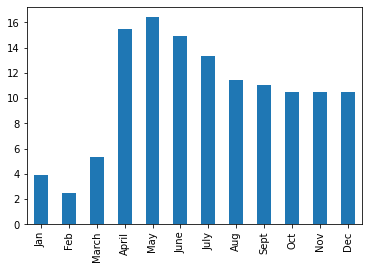

In [230]:
test_2['California'].plot(x='California', kind='bar')

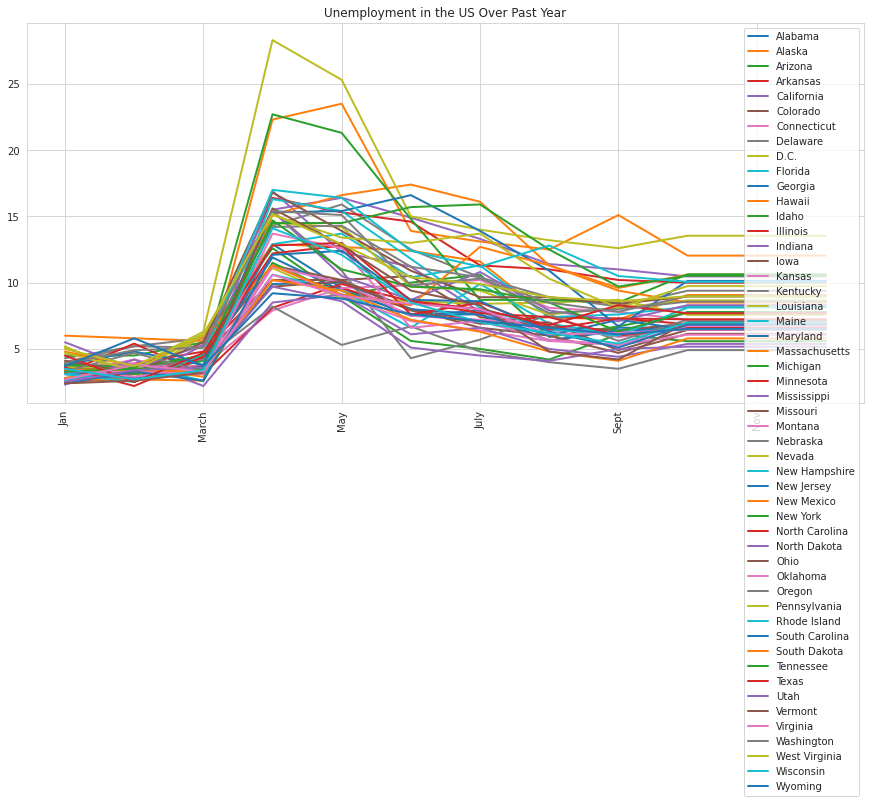

In [289]:
plt.figure(figsize=(15,7))
for col in test_2:
  test_2[col].plot(x=col, linewidth=2)
  plt.xticks(rotation=90)
plt.legend(test_2.columns)
plt.title('Unemployment in the US Over Past Year')
plt.show()

# Part 2 Conclusions


*   Unemployment rates in the US spiked around the same time for all 50 states, in the month of April, which corroborates with the fact that April was when quarantine was placed in effect and mandated throughout the country 
  *   April was previously shown to be the deadliest month in terms of cases
  *   Unfortunately, the dataset only has unemployment rates for the year of 2020, so rates can't be compared to the recent increase in COVID cases in January 2021, which also happens to the deadliest month in terms of cases
*   The rates then decreased but still stayed relatively high in May, but they dropped significantly by June 
*   They then steadily decreased from that point on, but never returned back to pre-COVID unemployment rates





# Part 3 COVID Stock Market Analysis

Perform stock market data analysis

*   Explore your favorite stocks
*   How your favorite stocks performed during pandemic period 
*   Do you notice any trend for your stocks



**Task 1:** Setting up the Environment

In [231]:
! pip install pandas_datareader

In [232]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

**Task 2:** Gathering stock data for Apple, Google, Microsoft and Amazon

In [233]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabbing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [234]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,101.000853,98.032718,99.516766,99.564791,1.562407e+08,99.313321
std,23.631436,23.099091,23.534781,23.346812,7.050409e+07,23.488304
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.861874,78.121252,78.836872,78.749376,1.060912e+08,78.472258
50%,103.185001,98.783749,101.028751,102.308750,1.375974e+08,101.948738
75%,120.439999,116.824999,118.770000,119.022497,1.859723e+08,118.817507
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,143.160004


In [235]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-31 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


**Task 3:** Exploratory Data Analysis (EDA)

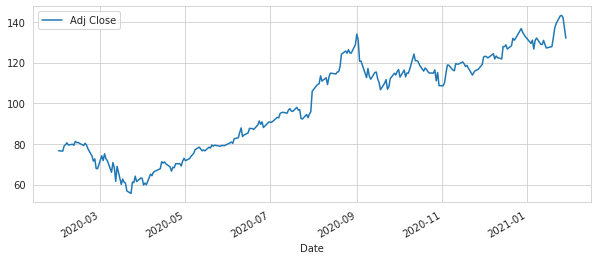

In [236]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

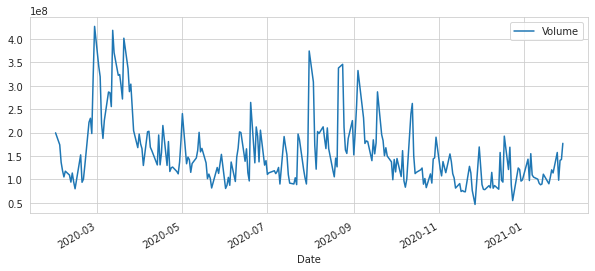

In [237]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [238]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,80.669998,77.072502,80.232498,77.377502,199588400.0,76.714989
2020-02-03,78.372498,75.555000,76.074997,77.165001,173985600.0,76.504311
2020-02-04,79.910004,78.407501,78.827499,79.712502,136616400.0,79.029999
2020-02-05,81.190002,79.737503,80.879997,80.362503,118826800.0,79.674438
2020-02-06,81.305000,80.065002,80.642502,81.302498,105425600.0,80.606384


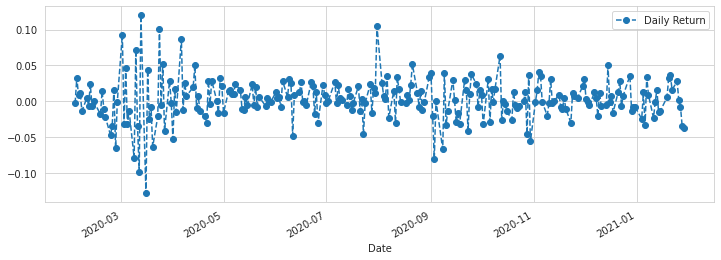

In [239]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


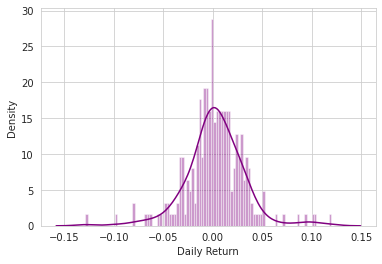

In [240]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

In [241]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [242]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-31,76.714989,1434.229980,168.445557,2008.719971
2020-02-03,76.504311,1485.939941,172.552048,2004.199951
2020-02-04,79.029999,1447.069946,178.231873,2049.669922
2020-02-05,79.674438,1448.229980,178.014191,2039.869995
2020-02-06,80.606384,1476.229980,181.705093,2050.229980


In [243]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


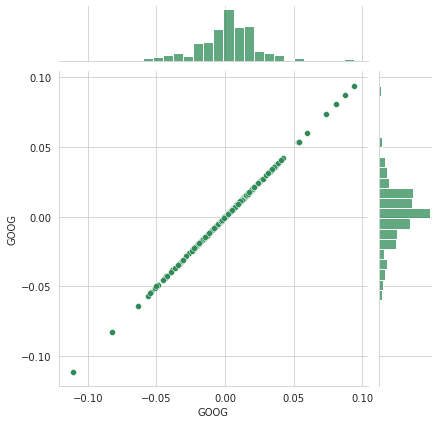

In [244]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


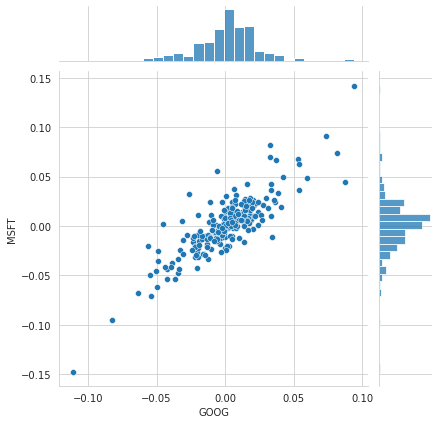

In [245]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

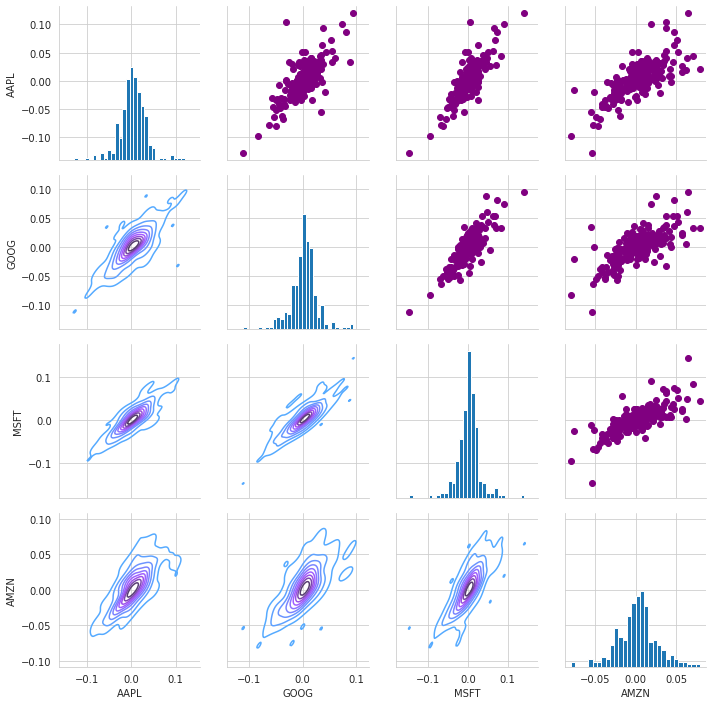

In [246]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

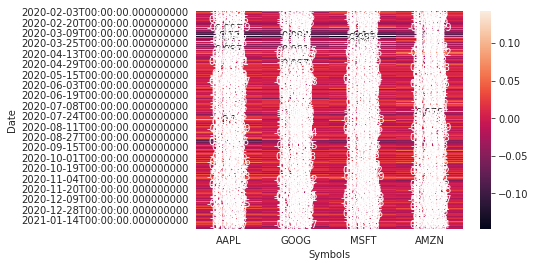

In [247]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna(),annot=True)

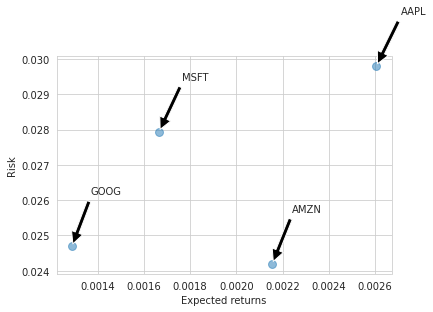

In [248]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.025])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black', shrink=0.05)
        # arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
        )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


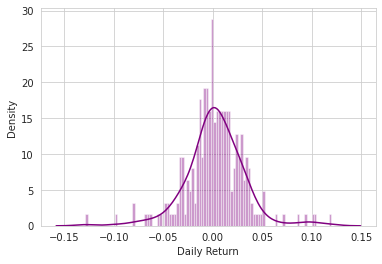

In [249]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [250]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.043731267347628444

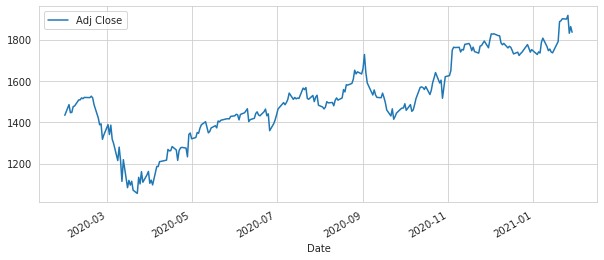

In [251]:
# Historical view of the closing price for Google stock
GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

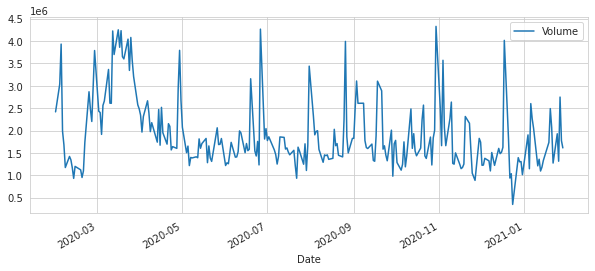

In [252]:
#Total volume of stock being traded over past 5 years
GOOG['Volume'].plot(legend=True,figsize=(10,4))

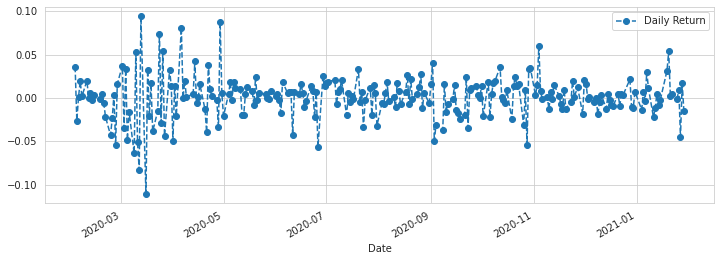

In [254]:
# We'll use pct_change to find the percent change for each day
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
GOOG['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


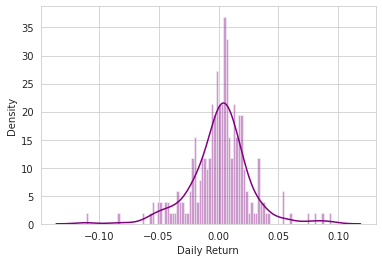

In [256]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='purple')

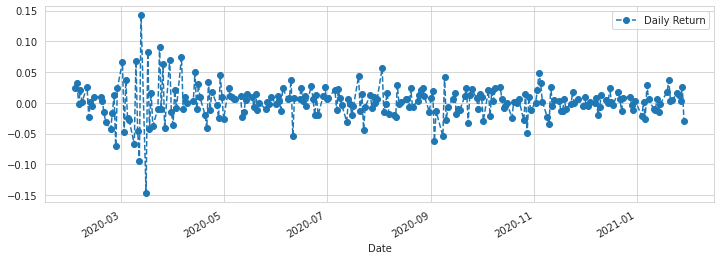

In [257]:
# We'll use pct_change to find the percent change for each day
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
MSFT['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

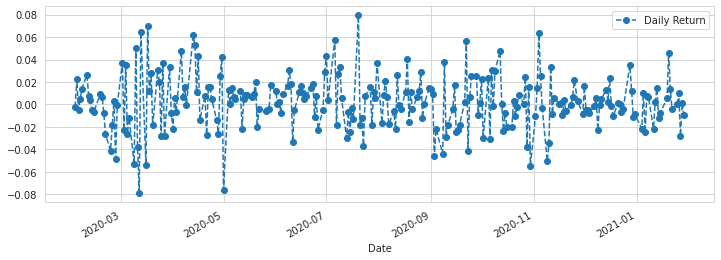

In [258]:
# We'll use pct_change to find the percent change for each day
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AMZN['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

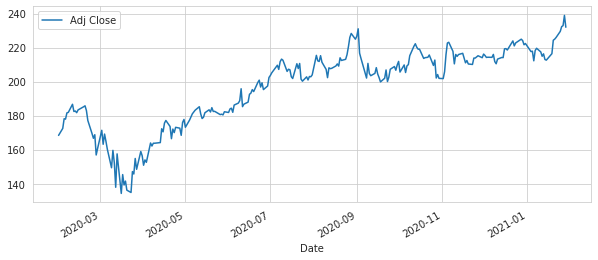

In [269]:
# Historical view of the closing price for Google stock
MSFT['Adj Close'].plot(legend=True,figsize=(10,4))

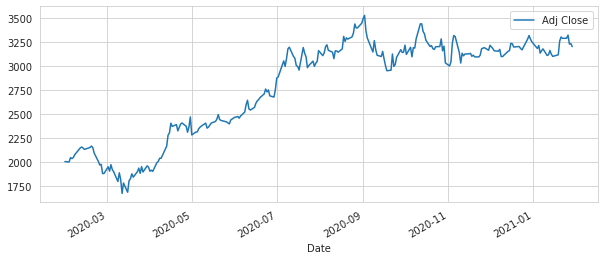

In [270]:
# Historical view of the closing price for Google stock
AMZN['Adj Close'].plot(legend=True,figsize=(10,4))

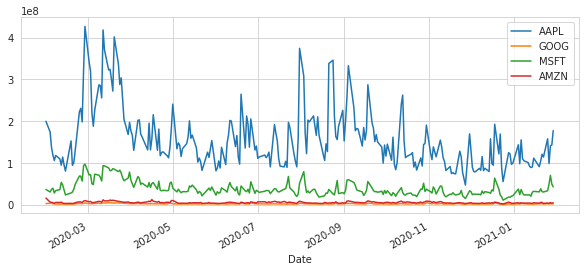

In [281]:
# All 4 stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN']
for company in tech_list:
   globals()[company]['Volume'].plot(figsize=(10,4))
plt.legend(['AAPL','GOOG','MSFT','AMZN'])
plt.show()

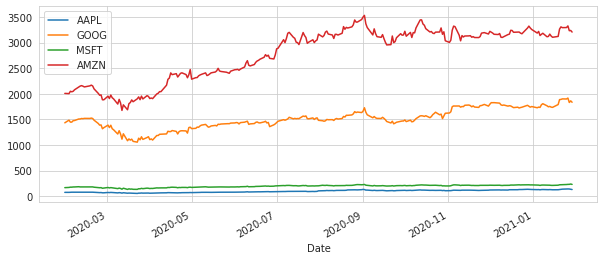

In [288]:
# All 4 stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN']
for company in tech_list:
   globals()[company]['Adj Close'].plot(figsize=(10,4))
plt.legend(['AAPL','GOOG','MSFT','AMZN'])
plt.show()

# Part 3 Conclusions

Based on the graphs shown above: 

*   Google is shown to be a low-risk stock with steadily raising daily returns 
*   The riskiest stock appears to be Apple, which also happens to be the stock with the highest return potential
*  Amazon is actually lower-risk stock than even Google, but it offers much higher returns making it the best stock to invest in out of the four 
*   Of the four, Microsoft appears to have the least change in its daily return value over the past year
*   The stock market appeared to hit a low in April 
*   Apple stocks seem be traded the most on a daily basis, but Amazon stocks have the highest closing prices








# Final Conclusions

*   April 2020 was shown to be one of the worst months for most Americans 
    *   April had the most number of deaths related to COVID in the past year
    *   Unemployment rates spiked in April to their highest rate in the past year 
    *   The stock market reached a new low in April as well
    *   Apple, Google, Microsoft, and Amazon are all high-yield and stable companies that have managed to stay afloat in the pandemic, but even their stocks reached a new low point in the month of April 
*   Americans appeared to have come to terms with COVID
    *   The stock market is steadily increasing in spite of new spikes in the number of cases (This could also be due to the fact that more people have time to spend on the stock market as a conseqeuence of being stuck at home)
    *   Unemployment rates are steadily decreasing, which is most likely due to the fact that most companies and organizations have transitioned to working remotely
    *   Although the number of new cases have been rapidly increasing in recent month, the number of deaths have not and have remained relatively low





